# Laboratorio 3: Detección de movimiento y tracking

**Parte 1:** Detección de movimiento con diferencia de frames y modelo de fondo 

1.

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import scandir

In [7]:
def frame_differencing(im1, im2, th= 30):
    
    return (((im2-im1) > th).astype(int)) * 255

In [2]:
im1 = cv2.imread(r'C:\Users\aleja\Desktop\exp3\seq1\image-0001.jpg',0)
im2 = cv2.imread(r'C:\Users\aleja\Desktop\exp3\seq1\image-0002.jpg',0)

NameError: name 'cv2' is not defined

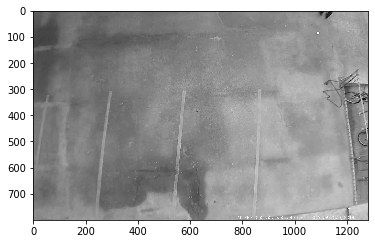

In [7]:
plt.imshow(im1, cmap = 'gray')

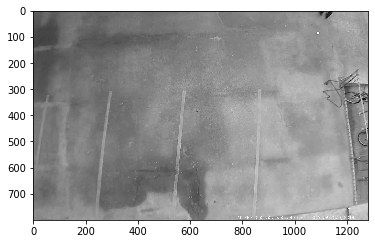

In [8]:
plt.imshow(im1, cmap = 'gray')

In [9]:
r = frame_differencing(im1,im2, 50)

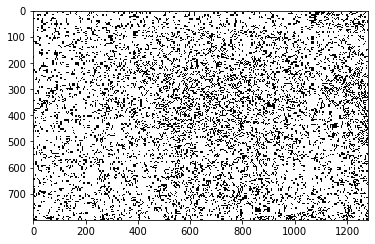

In [10]:
plt.imshow(r, cmap = 'Greys',interpolation='nearest')

In [51]:
from os import scandir
import numpy as np
def detector(seq):
    direct= 'C:/Users/aleja/Desktop/exp3/'+ seq + '/'
    directory = 'seq4/' + seq + '/'
    ims_names = [im.name for im in scandir(direct)] #se listan los nombres de las imagenes del directorio
    ims_names = sorted(ims_names) #se ordenan alfabeticamente
    frame_width = 1280
    frame_height = 800
    out = cv2.VideoWriter('outpyrb.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                          (frame_width,frame_height),
                          isColor = False)

    #dif = []
    
        
    for j, im in enumerate(ims_names[:-1]):
        im1 = cv2.imread(direct + im,0)
        im2 = cv2.imread(direct + ims_names[j+1],0)
        diff = cv2.absdiff(im1, im2)
        blur = cv2.GaussianBlur(diff, (5,5), 0)
        _, thresh = cv2.threshold(blur, 25, 255, cv2.THRESH_BINARY)
        
    
        out.write(thresh)
        #out.write(np.uint8(im1))
        
    out.release()



In [52]:
detector('seq1')

In [20]:
vid

In [11]:
#guarda el video con las imagenes a color
def detectororigin(seq, th, method = frame_differencing):
    direct= 'C:/Users/aleja/Desktop/exp3/'+ seq + '/'
    #directory = 'seq4/' + seq + '/'
    ims_names = [im.name for im in scandir(direct)] #se listan los nombres de las imagenes del directorio
    ims_names = sorted(ims_names) #se ordenan alfabeticamente
    frame_width = 1280
    frame_height = 800
    out = cv2.VideoWriter('outoriginpy.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, 
                          (frame_width,frame_height), isColor=True)
    
    
    for j, im in enumerate(ims_names[:-1]):
        im1 = cv2.imread(direct + im)
        im2 = cv2.imread(direct + ims_names[j+1])
        #dif.append(method(im1, im2))
       
        out.write(np.uint8(im1))
        
    out.release()
        
  

In [12]:
detectororigin('seq1', th=25)

In [13]:
#deteccion de movimiento enceerado en cuadrados con el video original
cap = cv2.VideoCapture(r'C:\Users\aleja\Documents\Python Scripts\outoriginpy.avi')
#cap = cv2.VideoCapture('vtest.avi')
frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))

frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

out = cv2.VideoWriter("output.avi", fourcc, 5.0, (1280,720))

ret, frame1 = cap.read()
ret, frame2 = cap.read()
print(frame1.shape)


while cap.isOpened():
    diff = cv2.absdiff(frame1, frame2)
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh, None, iterations=3)
    _,contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)

        if cv2.contourArea(contour) < 900:
            continue
        cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 3)
    #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)

    image = cv2.resize(frame1, (1280,720))
    out.write(image)
    cv2.imshow("feed", frame1)
    frame1 = frame2
    ret, frame2 = cap.read()

    if cv2.waitKey(40) == 27:
        break

cv2.destroyAllWindows()
cap.release()
out.release()

(800, 1280, 3)


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\arithm.cpp:659: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'
